In [7]:
test_set_path = "./training/ABSA-BERT-pair/data/apa/bert-pair/test_NLI_M2.tsv"
results_path = "./models/tabsa/bert-pair-nli-m2/test_ep_4.txt"

In [8]:
sentiment_dict = {'None': 0,
 'Positive': 1,
 'Negative': 2,
 'Neutral': 3
 }

sentiment_dict_inv = {v: k for k, v in sentiment_dict.items()}

result_sentiments = []
with open(results_path, 'r') as results_file:
    results = results_file.readlines()
    for i in range(len(results)):
        result_sentiments.append(sentiment_dict_inv[int(results[i][0])])

In [9]:
import pandas as pd

test_set = pd.read_csv(test_set_path, sep='\t')

In [10]:
test_set
# replace nan with 'none'
test_set = test_set.fillna('None')

In [11]:
test_set['predicted_sentiment'] = result_sentiments

In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example DataFrame
df = test_set

# Calculate metrics
accuracy = accuracy_score(df['label'], df['predicted_sentiment'])
precision = precision_score(df['label'], df['predicted_sentiment'], average='macro')
recall = recall_score(df['label'], df['predicted_sentiment'], average='macro')
f1 = f1_score(df['label'], df['predicted_sentiment'], average='macro')

# Calculate metrics for each class
precision_per_class = precision_score(df['label'], df['predicted_sentiment'], average=None, labels=['Positive', 'Negative', 'Neutral', 'None'])
recall_per_class = recall_score(df['label'], df['predicted_sentiment'], average=None, labels=['Positive', 'Negative', 'Neutral', 'None'])
f1_per_class = f1_score(df['label'], df['predicted_sentiment'], average=None, labels=['Positive', 'Negative', 'Neutral', 'None'])

# Confusion matrix
conf_matrix = confusion_matrix(df['label'], df['predicted_sentiment'], labels=['Positive', 'Negative', 'Neutral', 'None'])

# Display results
print("Average Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}\n")

print("Metrics per Class:")
for idx, label in enumerate(['Positive', 'Negative', 'Neutral', 'None']):
    print(f"{label}:")
    print(f"  Precision: {precision_per_class[idx]:.2f}")
    print(f"  Recall: {recall_per_class[idx]:.2f}")
    print(f"  F1 Score: {f1_per_class[idx]:.2f}\n")

print("Confusion Matrix:")
print(conf_matrix)


Average Metrics:
Accuracy: 0.88
Precision: 0.78
Recall: 0.48
F1 Score: 0.55

Metrics per Class:
Positive:
  Precision: 0.53
  Recall: 0.29
  F1 Score: 0.38

Negative:
  Precision: 1.00
  Recall: 0.26
  F1 Score: 0.41

Neutral:
  Precision: 0.69
  Recall: 0.37
  F1 Score: 0.48

None:
  Precision: 0.90
  Recall: 0.98
  F1 Score: 0.94

Confusion Matrix:
[[ 10   0   1  23]
 [  0   7   2  18]
 [  3   0  18  28]
 [  6   0   5 615]]


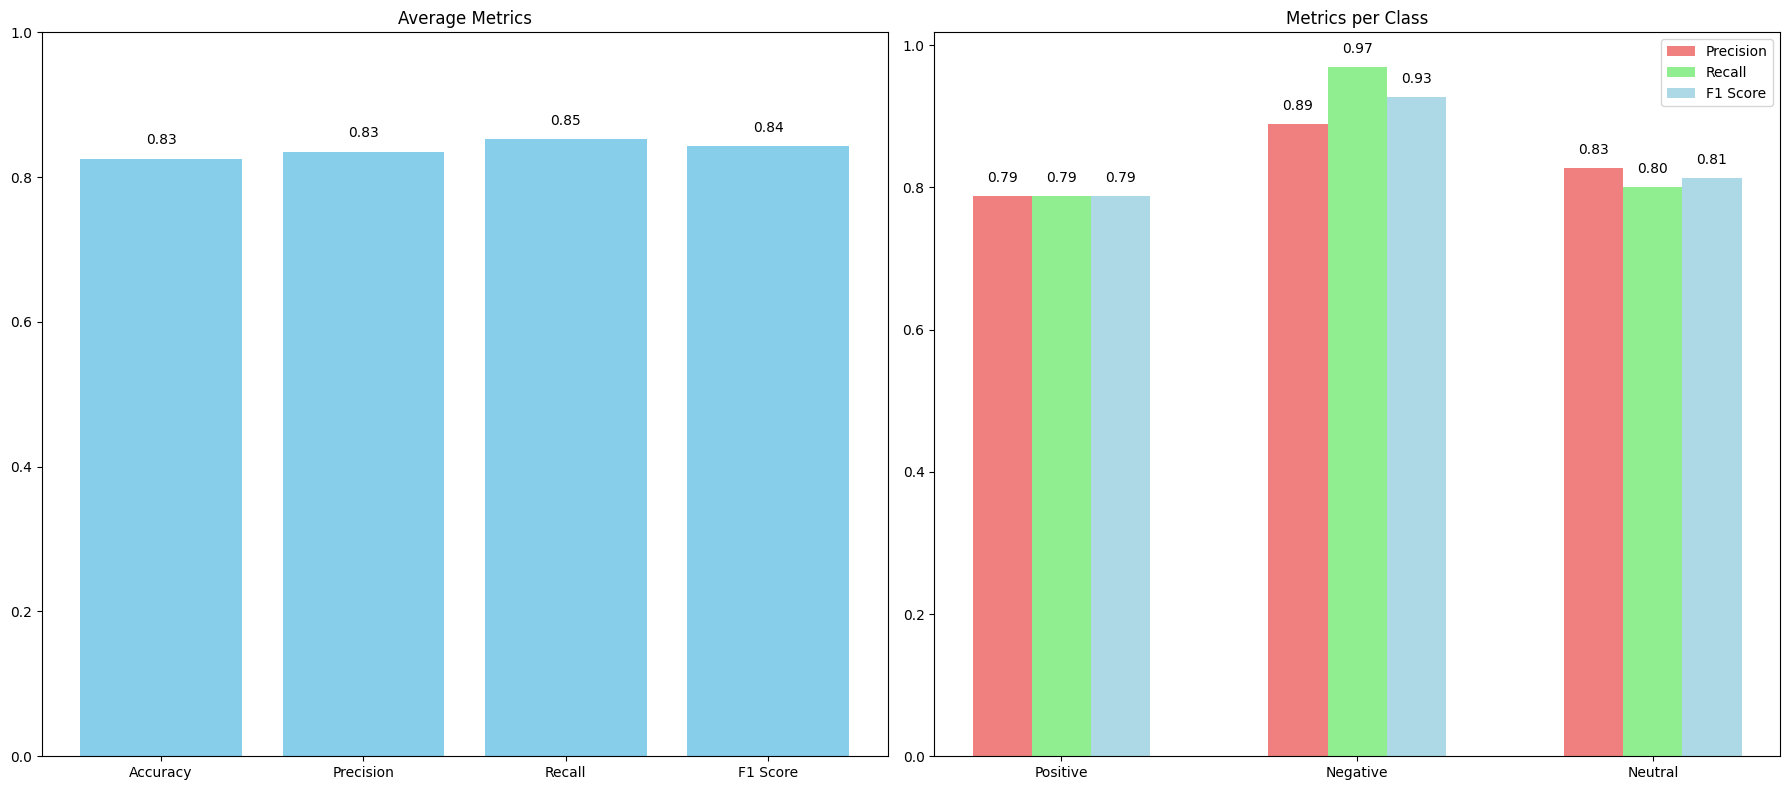

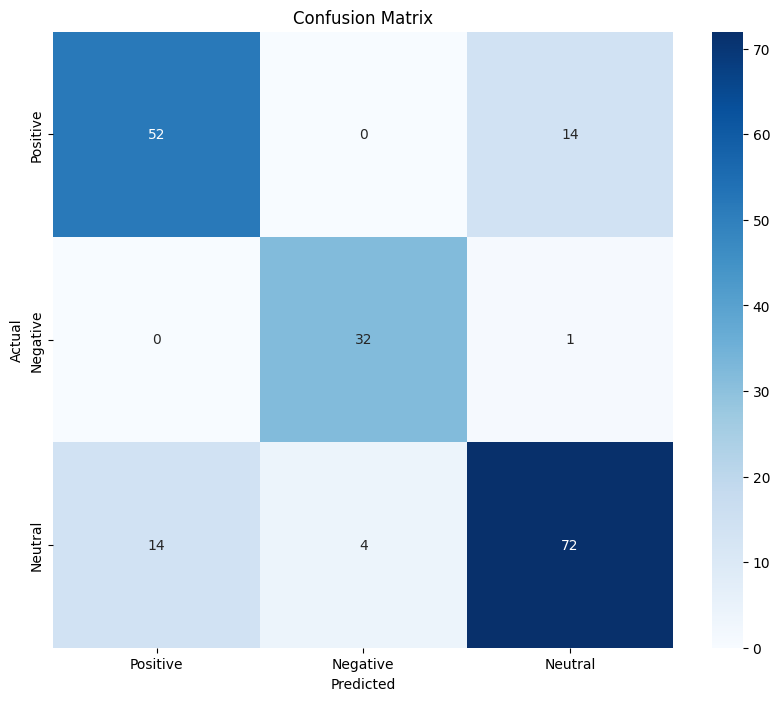

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Metrics per class
metrics_per_class = {
    'Positive': {'Precision': 0.7879, 'Recall': 0.7879, 'F1 Score': 0.7879},
    'Negative': {'Precision': 0.8889, 'Recall': 0.9697, 'F1 Score': 0.9275},
    'Neutral': {'Precision': 0.8276, 'Recall': 0.8000, 'F1 Score': 0.8136}
}

# Confusion matrix
conf_matrix = np.array([[52,  0, 14],
                        [ 0, 32,  1],
                        [14,  4, 72]])

# Plotting metrics per class
classes = list(metrics_per_class.keys())
x = np.arange(len(classes))
width = 0.2

precision = [metrics_per_class[cls]['Precision'] for cls in classes]
recall = [metrics_per_class[cls]['Recall'] for cls in classes]
f1 = [metrics_per_class[cls]['F1 Score'] for cls in classes]

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Average metrics (as an example, the weighted average of the provided metrics)
avg_metrics = {
    'Accuracy': 0.8254,  # From the report
    'Precision': np.mean(precision),
    'Recall': np.mean(recall),
    'F1 Score': np.mean(f1)
}

ax[0].bar(avg_metrics.keys(), avg_metrics.values(), color='skyblue')
ax[0].set_title('Average Metrics')
ax[0].set_ylim(0, 1)
for i, v in enumerate(avg_metrics.values()):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Metrics per class
ax[1].bar(x - width, precision, width, label='Precision', color='lightcoral')
ax[1].bar(x, recall, width, label='Recall', color='lightgreen')
ax[1].bar(x + width, f1, width, label='F1 Score', color='lightblue')

ax[1].set_title('Metrics per Class')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classes)
ax[1].legend()

for i in range(len(classes)):
    ax[1].text(i - width, precision[i] + 0.02, f"{precision[i]:.2f}", ha='center')
    ax[1].text(i, recall[i] + 0.02, f"{recall[i]:.2f}", ha='center')
    ax[1].text(i + width, f1[i] + 0.02, f"{f1[i]:.2f}", ha='center')

plt.tight_layout()

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


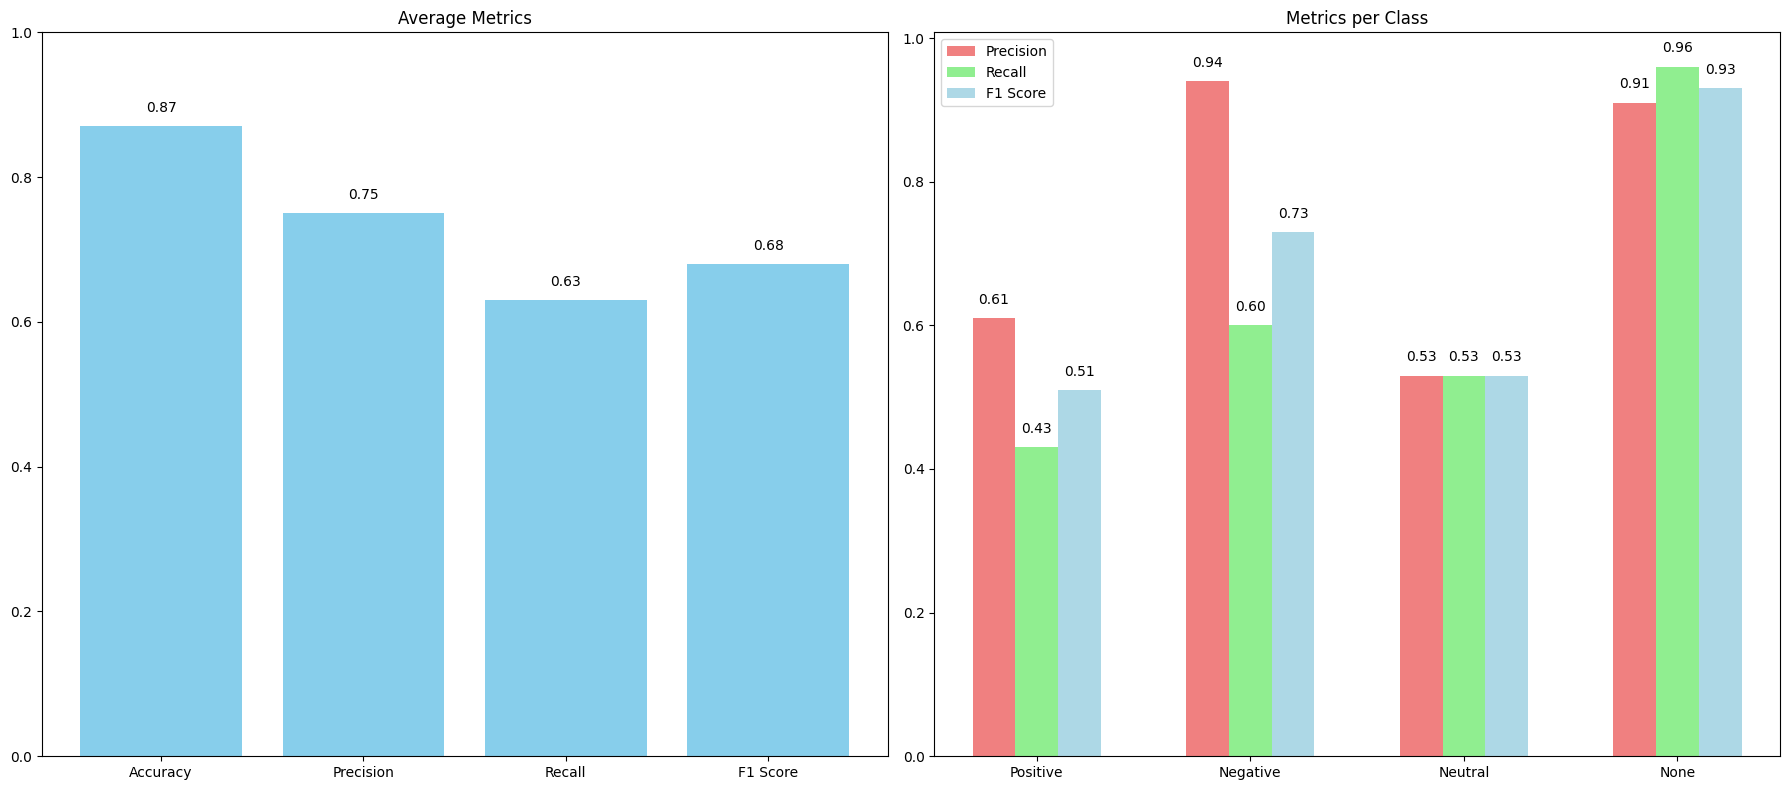

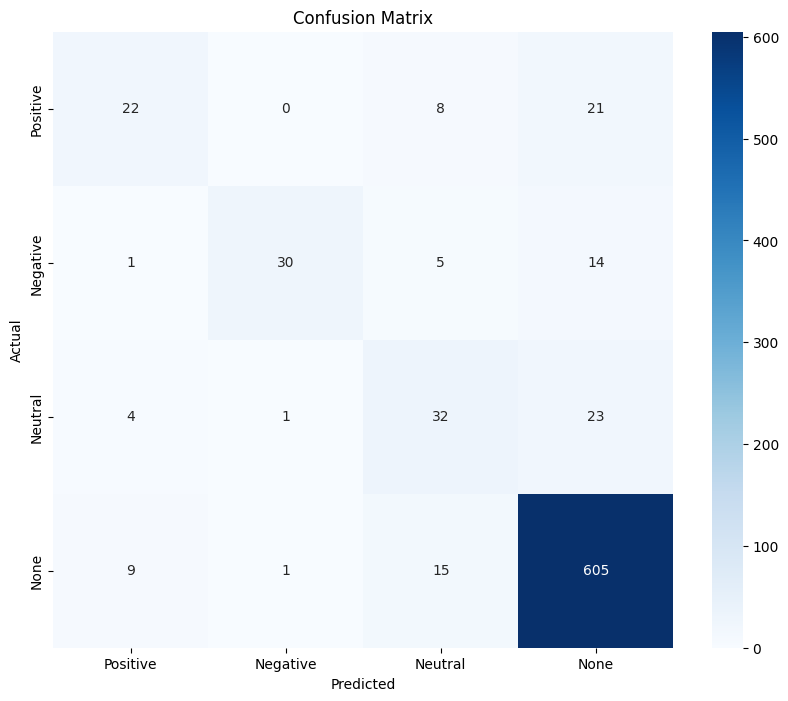

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metrics data
avg_metrics = {
    'Accuracy': 0.87,
    'Precision': 0.75,
    'Recall': 0.63,
    'F1 Score': 0.68
}

metrics_per_class = {
    'Positive': {'Precision': 0.61, 'Recall': 0.43, 'F1 Score': 0.51},
    'Negative': {'Precision': 0.94, 'Recall': 0.60, 'F1 Score': 0.73},
    'Neutral': {'Precision': 0.53, 'Recall': 0.53, 'F1 Score': 0.53},
    'None': {'Precision': 0.91, 'Recall': 0.96, 'F1 Score': 0.93}
}

conf_matrix = np.array([[ 22,  0,  8, 21],
                        [  1, 30,  5, 14],
                        [  4,  1, 32, 23],
                        [  9,  1, 15,605]])

# Plotting average metrics
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Average metrics
ax[0].bar(avg_metrics.keys(), avg_metrics.values(), color='skyblue')
ax[0].set_title('Average Metrics')
ax[0].set_ylim(0, 1)
for i, v in enumerate(avg_metrics.values()):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Metrics per class
classes = list(metrics_per_class.keys())
x = np.arange(len(classes))
width = 0.2

precision = [metrics_per_class[cls]['Precision'] for cls in classes]
recall = [metrics_per_class[cls]['Recall'] for cls in classes]
f1 = [metrics_per_class[cls]['F1 Score'] for cls in classes]

ax[1].bar(x - width, precision, width, label='Precision', color='lightcoral')
ax[1].bar(x, recall, width, label='Recall', color='lightgreen')
ax[1].bar(x + width, f1, width, label='F1 Score', color='lightblue')

ax[1].set_title('Metrics per Class')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classes)
ax[1].legend()

for i in range(len(classes)):
    ax[1].text(i - width, precision[i] + 0.02, f"{precision[i]:.2f}", ha='center')
    ax[1].text(i, recall[i] + 0.02, f"{recall[i]:.2f}", ha='center')
    ax[1].text(i + width, f1[i] + 0.02, f"{f1[i]:.2f}", ha='center')

plt.tight_layout()

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()